In [45]:
# Import the dependencies.
import pandas as pd
import psycopg2

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats
import numpy
import pandas as pd
import statsmodels.api as sm

import plotly.graph_objects as px

In [46]:
# Connect to your postgres DB
conn = psycopg2.connect(database = "Atlantic Ocean", 
                        user = "postgres", 
                        host= 'localhost',
                        password = "Avaska@2033",
                        port = 5432)

In [47]:
# Open a cursor to perform database operations
cur = conn.cursor()
cur.execute('SELECT * FROM Atlantic_Ocean;')
rows = cur.fetchall()
conn.commit()
for row in rows:
    print(row)

('Atlantic Ocean', 'Baltic Sea', 0.81)
('Atlantic Ocean', 'Bay of Biscay', 4.73)
('Atlantic Ocean', 'Black Sea', 3.46)
('Atlantic Ocean', 'Caribbean Sea', 22616.19)
('Atlantic Ocean', 'Celtic Sea', 457.39)
('Atlantic Ocean', 'Coastal Waters of Florida', 0.09)
('Atlantic Ocean', 'English Channel', 123.04)
('Atlantic Ocean', 'Florida Keys National Marine Sanctuary', 0.04)
('Atlantic Ocean', 'Gulf of Bothnia', 0.0)
('Atlantic Ocean', 'Gulf of Mexico', 338947.85)
('Atlantic Ocean', 'Gulf of St. Lawrence', 0.85)
('Atlantic Ocean', 'Inner Seas off the West Coast of Scotland', 14.94)
('Atlantic Ocean', "Irish Sea and St. George's Channel", 182.7)
('Atlantic Ocean', 'Kattegat', 63.03)
('Atlantic Ocean', 'Labrador Sea', 0.12)
('Atlantic Ocean', 'Mediterranean Sea', 1484.8)
('Atlantic Ocean', 'New York Bight', 0.16)
('Atlantic Ocean', 'North Sea', 49.15)
('Atlantic Ocean', 'Skagerrak Strait', 144.01)
('Atlantic Ocean', 'Stellwagen Bank National Marine Sanctuary', 0.37)


In [48]:
cur = conn.cursor()
cur.execute('SELECT * FROM Atlantic_Ocean;')

In [49]:
Atlantic_Ocean_df=pd.DataFrame(rows, columns=['Oceans','Regions',
                               'Measurement'])
Atlantic_Ocean_df.head()

,Oceans,Regions,Measurement
0,Atlantic Ocean,Baltic Sea,0.81
1,Atlantic Ocean,Bay of Biscay,4.73
2,Atlantic Ocean,Black Sea,3.46
3,Atlantic Ocean,Caribbean Sea,22616.19
4,Atlantic Ocean,Celtic Sea,457.39


In [50]:
#Split up our data into groups based regions
Region_groups=Atlantic_Ocean_df.groupby(['Regions'])
Region_groups

In [51]:
mesurmenst_sum_up=Region_groups[['Measurement']].sum()
mesurmenst_sum_up.head()

,Measurement
Regions,
Baltic Sea,0.81
Bay of Biscay,4.73
Black Sea,3.46
Caribbean Sea,22616.19
Celtic Sea,457.39


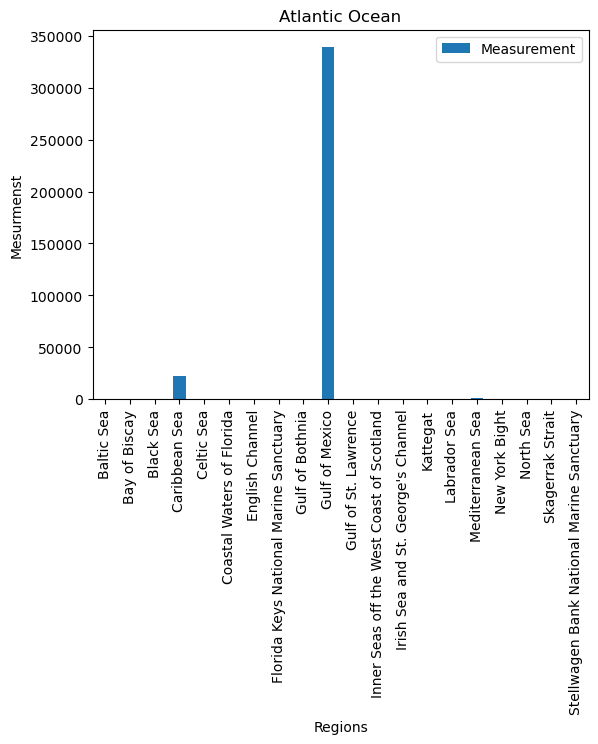

<Figure size 640x480 with 0 Axes>

In [58]:
# Chart our data, give it a title, and label the axes
Atl_Ocean_df_Chart = mesurmenst_sum_up.plot(kind="bar", title="Atlantic Ocean")
Atl_Ocean_df_Chart.set_xlabel("Regions")
Atl_Ocean_df_Chart.set_ylabel("Mesurmenst")

plt.show()
plt.tight_layout()